In [45]:
import matplotlib.pyplot as plt
import numpy as np

## Working with Classification Problems

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
print(mnist["data"].shape)
print(mnist["target"].shape)

(70000, 784)
(70000,)


## Viewing an Image

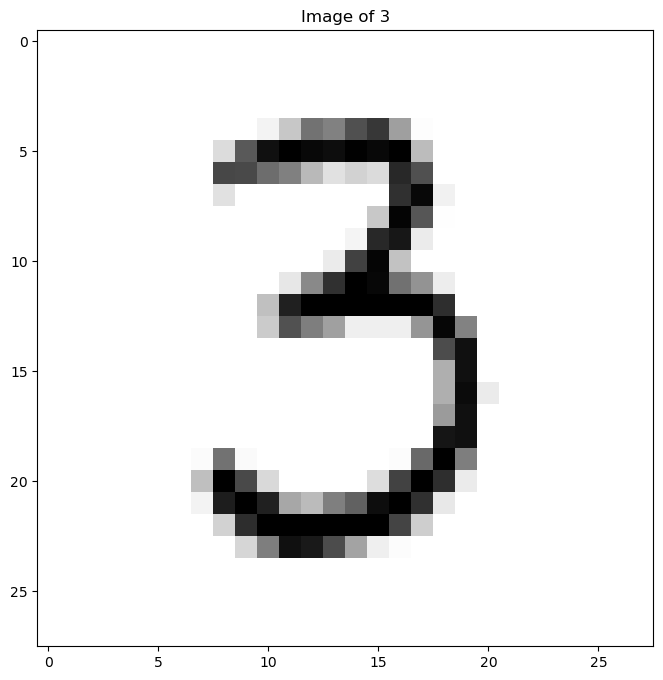

In [4]:
def plot_image(idx):
    # Accessing and Converting the Image
    img_array = mnist["data"].iloc[idx].to_numpy()
    img_array = img_array.reshape(28, 28)
    
    # Plotting the Image
    plt.figure(figsize=(8, 8))
    plt.title(f"Image of {mnist['target'].iloc[idx]}")
    plt.imshow(img_array, cmap="binary")
    
plot_image(50)

## Seperating the Train and Test Sets

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], test_size=0.12, shuffle=True, random_state=17)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (61600, 784)
y_train:  (61600,)
X_test:  (8400, 784)
y_test:  (8400,)


In [6]:
# Segregating all the 7's
y_train_7 = (y_train == 7)
print(y_train_7.head())
print(y_train_7.shape)

35274    False
58149    False
58695    False
59538    False
3034     False
Name: class, dtype: bool
(61600,)


In [7]:
y_test_7 = (y_test == 7)
print(y_test_7.head())
print(y_test_7.shape)

3938     False
14210    False
28158    False
55574    False
61527    False
Name: class, dtype: bool
(8400,)


In [8]:
from sklearn.ensemble import RandomForestClassifier

# Initialisation
rfc = RandomForestClassifier(n_jobs=-1, random_state=17)

# Training
rfc.fit(X_train, y_train_7)

RandomForestClassifier(n_jobs=-1, random_state=17)

In [9]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(
    estimator=rfc,
    X=X_test,
    y=y_test_7,
    scoring="accuracy",
    n_jobs=-1
)

print(score)

[1. 1. 1. 1. 1.]


In [10]:
# Implementing Cross-Validation Score
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

# Initialising the KFolds
folds = StratifiedKFold(shuffle=True, random_state=17)

# Carrying out CV_Scoring
print("\nBeginning Cross Validation Score:")
i = 1
for train_idx, test_idx in folds.split(X_train, y_train_7):
    rfc_clone = clone(RandomForestClassifier())
    
    # Training fold
    X_train_fold, y_train_7_fold = X_train.iloc[train_idx], y_train_7.iloc[train_idx]
    
    # Testing fold
    X_test_fold, y_test_7_fold = X_train.iloc[test_idx], y_train_7.iloc[test_idx]
    
    # Training
    rfc_clone.fit(X_train_fold, y_train_7_fold)
    
    # Testing
    predictions = rfc_clone.predict(X_test_fold)
    correctness = sum(y_test_7_fold == predictions)
    print(f"Score for {i}th Cross Validation Split is: {correctness / len(predictions)}")
    
    i += 1


Beginning Cross Validation Score:
Score for 1th Cross Validation Split is: 1.0
Score for 2th Cross Validation Split is: 1.0
Score for 3th Cross Validation Split is: 1.0
Score for 4th Cross Validation Split is: 1.0
Score for 5th Cross Validation Split is: 1.0


## Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

# Testing
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train_7)

predictions = cross_val_predict(rfc, X_test, y_test_7, cv=5, n_jobs=-1)
confusion_matrix(y_test_7, predictions, labels=[True, False])

array([[   0,    0],
       [   0, 8400]])

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_7)

predictions = cross_val_predict(sgd_clf, X_test, y_test_7, n_jobs=-1)
confusion_matrix(y_test_7, predictions)

ValueError: The number of classes has to be greater than one; got 1 class

In [ ]:
y_train = y_train.astype(int)
y_train.head()

In [ ]:
y_train_7 = (y_train == 7)
y_train_7 = y_train_7.astype(int)
y_train_7.head()

In [ ]:
y_train_7.tail()

In [13]:
X_train, X_test, y_train_7, y_test_7 = train_test_split(
    X_train, y_train_7
)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (46200, 784)
y_train:  (61600,)
X_test:  (15400, 784)
y_test:  (8400,)


In [14]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train, y_train_7)

predictions = cross_val_predict(sgd_clf, X_test, y_test_7, n_jobs=-1)
confusion_matrix(y_test_7, predictions)

ValueError: The number of classes has to be greater than one; got 1 class

In [15]:
X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=17, test_size=0.12)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(61600, 784)
(61600,)
(8400, 784)
(8400,)


In [16]:
# Converting the Datatypes
y_train = y_train.astype(int)
y_train.info()

<class 'pandas.core.series.Series'>
Index: 61600 entries, 35274 to 64753
Series name: class
Non-Null Count  Dtype
--------------  -----
61600 non-null  int64
dtypes: int64(1)
memory usage: 962.5 KB


In [17]:
# Creating the binary targets
y_train_5 = (y_train == 5)
y_train_5.info()

<class 'pandas.core.series.Series'>
Index: 61600 entries, 35274 to 64753
Series name: class
Non-Null Count  Dtype
--------------  -----
61600 non-null  bool 
dtypes: bool(1)
memory usage: 541.4 KB


In [18]:
# Converting the boolean
y_train_5 = y_train_5.astype(int)
y_train_5.info()

<class 'pandas.core.series.Series'>
Index: 61600 entries, 35274 to 64753
Series name: class
Non-Null Count  Dtype
--------------  -----
61600 non-null  int64
dtypes: int64(1)
memory usage: 962.5 KB


In [19]:
y_train_5.head()

35274    1
58149    0
58695    0
59538    1
3034     0
Name: class, dtype: int64

In [20]:
y_train_5.shape

(61600,)

In [21]:
X_train.shape

(61600, 784)

In [22]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(
    X_train, y_train_5
)

In [23]:
print(X_train_5.shape)
print(y_train_5.shape)
print(X_test_5.shape)
print(y_test_5.shape)

(46200, 784)
(46200,)
(15400, 784)
(15400,)


In [24]:
sgd_clf = SGDClassifier(n_jobs=-1)
scores_5 = cross_val_score(sgd_clf, X_train_5, y_train_5, scoring="accuracy", n_jobs=-1)
print(scores_5)

[0.95735931 0.96547619 0.96536797 0.94112554 0.96850649]


In [25]:
rfc = RandomForestClassifier(n_jobs=-1)
scores_5 = cross_val_score(rfc, X_train_5, y_train_5, scoring="accuracy", n_jobs=-1)
print(scores_5)

[0.98809524 0.98841991 0.98636364 0.98647186 0.98636364]


In [26]:
predictions_sgd = cross_val_predict(sgd_clf, X_test_5, y_test_5)
n_correct = sum(y_test_5 == predictions_sgd)
print(n_correct / len(predictions_sgd))

0.9544805194805195


In [27]:
confusion_matrix(y_test_5, predictions_sgd)

array([[13639,   367],
       [  334,  1060]])

In [28]:
predictions_rfc = cross_val_predict(rfc, X_test_5, y_test_5, n_jobs=-1)
n_correct = sum(predictions_rfc == y_test_5)
print(n_correct / len(predictions_rfc))

0.9803246753246754


In [29]:
confusion_matrix(y_test_5, predictions_rfc)

array([[13989,    17],
       [  286,  1108]])

In [30]:
# Precision Score
from sklearn.metrics import precision_score, recall_score, f1_score

for _ in [predictions_rfc, predictions_sgd]:
    print("\nAccuracy of Positive Prediction: ", precision_score(y_test_5, _))
    print("Accuracy of Correct Prediction: ", recall_score(y_test_5, _))
    print("Harmonic Mean: ", f1_score(y_test_5, _))


Accuracy of Positive Prediction:  0.9848888888888889
Accuracy of Correct Prediction:  0.7948350071736011
Harmonic Mean:  0.8797141722905915

Accuracy of Positive Prediction:  0.7428170988086895
Accuracy of Correct Prediction:  0.7604017216642754
Harmonic Mean:  0.7515065579581709


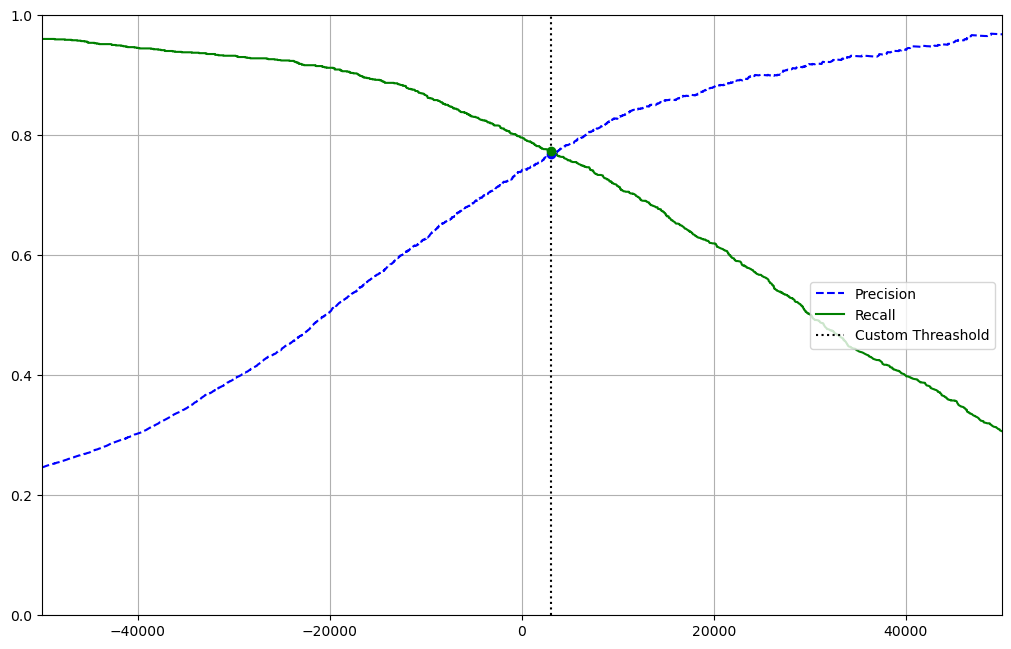

In [43]:
from sklearn.metrics import precision_recall_curve

# Preset Custom Value of Threashold
threashold = 3000

fig = plt.figure(figsize=(12, 10))
for object, name in [(SGDClassifier(), "sgd")]:
    object.fit(X_train_5, y_train_5)
    score = cross_val_predict(object, X_test_5, y_test_5, method="decision_function", n_jobs=-1) 
    precisions, recalls, threasholds = precision_recall_curve(y_test_5, score)
    
    # Calculating the Intercept
    intercept = (threasholds >= threashold).argmax()
    
    # Adding the Axes
    axes = fig.add_axes([0.1, 0.1, 0.8, 0.6])
    
    # Plotting the Graph
    axes.plot(threasholds, precisions[:-1], "b--", label="Precision")
    axes.plot(threasholds, recalls[:-1], "g-", label="Recall")
    axes.vlines(threashold, 0, 1, "k", "dotted", label="Custom Threashold")
    axes.plot(threasholds[intercept], precisions[intercept], "bo")
    axes.plot(threasholds[intercept], recalls[intercept], "go")
    
    # Anatomy
    plt.axis([-5e4, 5e4, 0, 1])
    plt.grid()
    plt.legend(loc="center right")

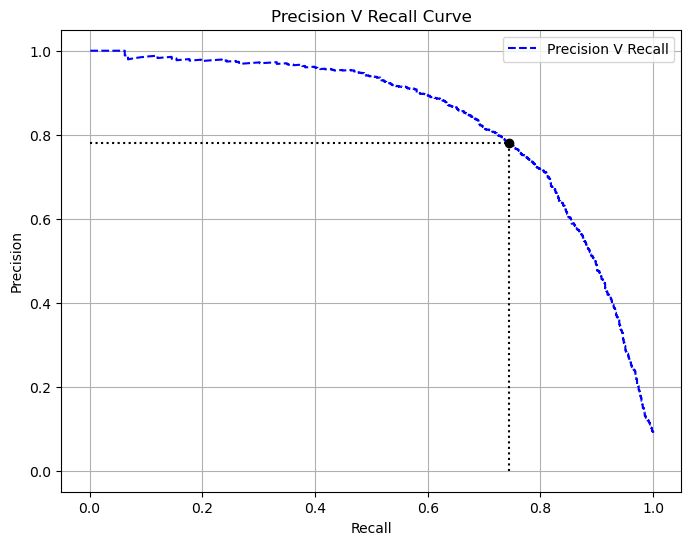

In [42]:
plt.figure(figsize=(8, 6))

plt.plot(recalls, precisions, "b--", label="Precision V Recall")
plt.plot([0, recalls[intercept]], [precisions[intercept], precisions[intercept]], "k:")
plt.plot([recalls[intercept], recalls[intercept]], [0, precisions[intercept]], "k:")
plt.plot(recalls[intercept], precisions[intercept], "ko")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision V Recall Curve")
plt.grid()
plt.legend()
plt.show()


In [53]:
threashold_at_90_percent = threasholds[np.argmax(precisions >= 0.90)]
print("The Threashold for 90% precision is: ", threashold_at_90_percent)

y_pred = (score >= threashold_at_90_percent)
print("New Precision: ", precision_score(y_test_5, y_pred))
print("New Recall: ", recall_score(y_test_5, y_pred))

IndexError: index 14515 is out of bounds for axis 0 with size 3

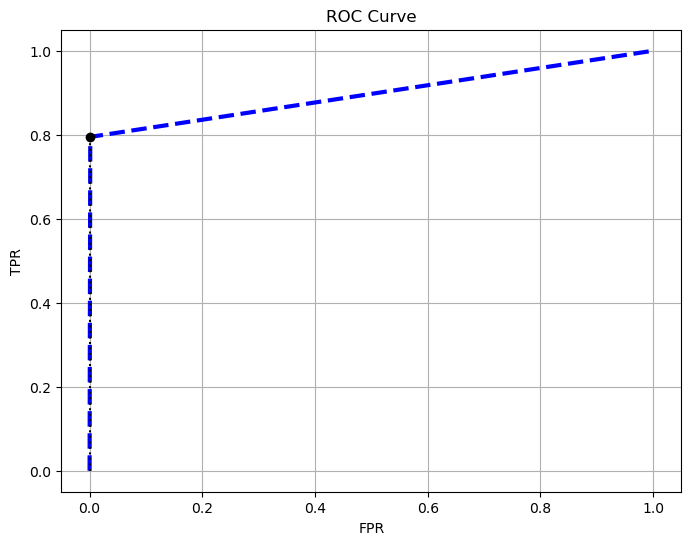

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, threasholds = roc_curve(y_test_5, predictions_rfc)

# Finding the ROC threashold for 90% precision
roc_threashold = (threasholds <= threashold_at_90_percent).argmax()
tpr_90, fpr_90 = tpr[roc_threashold], fpr[roc_threashold]

# Graph
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b--", linewidth=3, label="ROC")
plt.plot(fpr_90, tpr_90, "ko", label="Precision Intercept")
plt.plot([0, fpr[roc_threashold]], [tpr[roc_threashold], tpr[roc_threashold]], "k:")
plt.plot([fpr[roc_threashold], fpr[roc_threashold]], [0, tpr[roc_threashold]], "k:")

plt.title("ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()